In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

weather_2015 = pd.read_excel('ONTARIO-2015.xlsx')
weather_2016 = pd.read_excel('ONTARIO-2016.xlsx')
product_details = pd.read_excel('Product Details.xlsx')
purchase_frequency = pd.read_excel('Media data and other information.xlsx')
sales_data = pd.read_csv('ConsumerElectronics.csv')

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2372\1938338991.py:16: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('ConsumerElectronics.csv')


In [3]:
weather_2015 = weather_2015.iloc[23:]
weather_2016 = weather_2016.iloc[23:]

In [4]:
weather_2015.reset_index(drop=True, inplace=True)
weather_2016.reset_index(drop=True, inplace=True)

In [5]:
weather_2015.columns = weather_2015.iloc[0]
weather_2015 = weather_2015.drop(0, axis=0)

In [6]:
weather_2016.columns = weather_2016.iloc[0]
weather_2016 = weather_2016.drop(0, axis=0)

In [7]:
weather_2015['Date/Time'] = pd.to_datetime(weather_2015['Date/Time'])
weather_2016['Date/Time'] = pd.to_datetime(weather_2016['Date/Time'])

In [8]:
weather_2015['Date/Time'] = weather_2015['Date/Time'].dt.date
weather_2016['Date/Time'] = weather_2016['Date/Time'].dt.date

In [9]:
weather_2015 = weather_2015.fillna(0)
weather_2016 = weather_2016.fillna(0)

In [10]:
weather_2015 = weather_2015.rename(columns={'Date/Time': 'Date'})
weather_2016 = weather_2016.rename(columns={'Date/Time': 'Date'})

In [11]:
weather = pd.concat([weather_2015, weather_2016])

In [19]:
weather = weather.drop(['Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'], axis = 1)

In [21]:
weather.columns

Index(['Date', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag'],
      dtype='object', name=0)

In [22]:
weather.head()

,Date,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
1,2015-01-01,2015,1,1,†,0.0,0,-8.5,0,-4.3,...,0.0,0,0.0,0,0.0,0,0.0,0,0,0
2,2015-01-02,2015,1,2,†,3.0,0,-3.0,0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0,0
3,2015-01-03,2015,1,3,†,2.5,0,-4.0,0,-0.8,...,0.0,0,24.0,0,0.0,0,24.0,0,0,0
4,2015-01-04,2015,1,4,†,2.5,0,0.0,0,1.3,...,0.0,0,0.0,0,1.0,0,1.0,0,0,0
5,2015-01-05,2015,1,5,†,-10.0,0,-13.5,0,-11.8,...,0.0,0,0.0,0,3.0,0,3.0,0,1,0


In [13]:
sales_data.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Day
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,...,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,17
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,...,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,19
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,...,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,20
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,...,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,14
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,...,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,17


In [25]:
sales_data.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'Day'],
      dtype='object')

In [14]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
sales_data['Year'] = sales_data['order_date'].dt.year
sales_data['Month'] = sales_data['order_date'].dt.month
sales_data['Day'] = sales_data['order_date'].dt.day

In [26]:
merged_data = pd.merge(sales_data, weather, left_on=['Year', 'Month', 'Day'], right_on=['Year', 'Month', 'Day'], how='left')

In [27]:
merged_data.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
Day                                0
Date                               0
Data Quality                       0
Max Temp (°C)                      0
Max Temp Flag                      0
Min Temp (°C)                      0
Min Temp Flag                      0
M

In [28]:
merged_data.fillna(0, inplace=True)

In [29]:
le = LabelEncoder()
merged_data['order_payment_type'] = le.fit_transform(merged_data['s1_fact.order_payment_type'])

In [30]:
merged_data['pay_date'] = merged_data['Day'].apply(lambda x: 1 if x == 1 or x == 15 else 0)
merged_data['holiday_flag'] = merged_data['order_date'].dt.weekday.apply(lambda x: 1 if x in [5, 6] else 0)

In [31]:
scaler = StandardScaler()
merged_data[['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)']] = scaler.fit_transform(
    merged_data[['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)']])

In [43]:
merged_data['gmv'].describe()

count     1648824.0
unique      18086.0
top           999.0
freq        23738.0
Name: gmv, dtype: float64

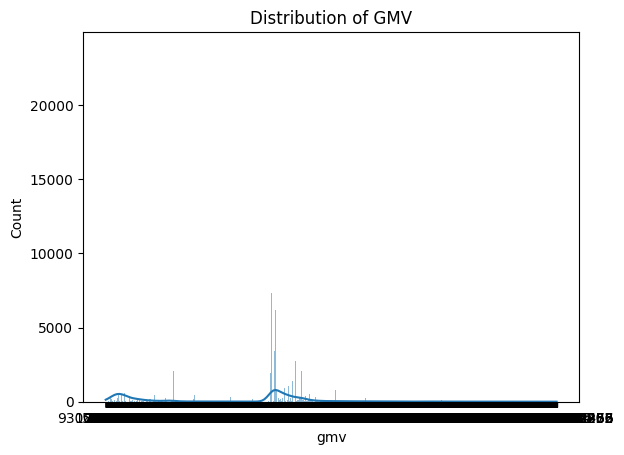

In [36]:
sns.histplot(merged_data['gmv'].astype(str), bins=50, kde=True)
plt.title('Distribution of GMV')
plt.show()

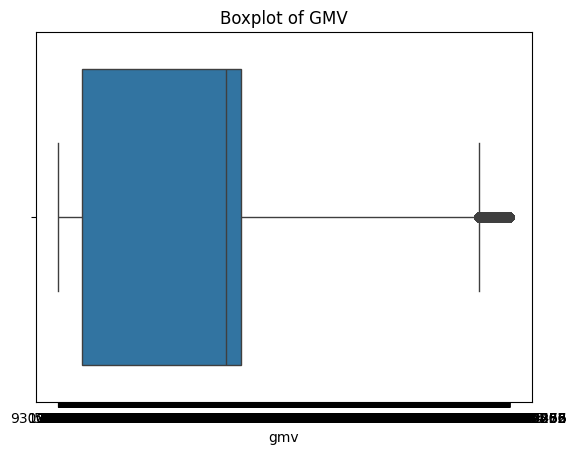

In [40]:
sns.boxplot(x=merged_data['gmv'].astype(str))
plt.title('Boxplot of GMV')
plt.show()

In [60]:
merged_data['gmv'].value_counts()

gmv
999.0               23738
999                 18303
169                 16616
299.0               13535
1299.0              12508
                    ...  
18045.0                 1
66980.0                 1
11332.0                 1
268.984737588652        1
19470.0                 1
Name: count, Length: 18086, dtype: int64

In [44]:
merged_data['units'].describe()

count    1.648824e+06
mean     1.022087e+00
std      2.535318e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.000000e+01
Name: units, dtype: float64

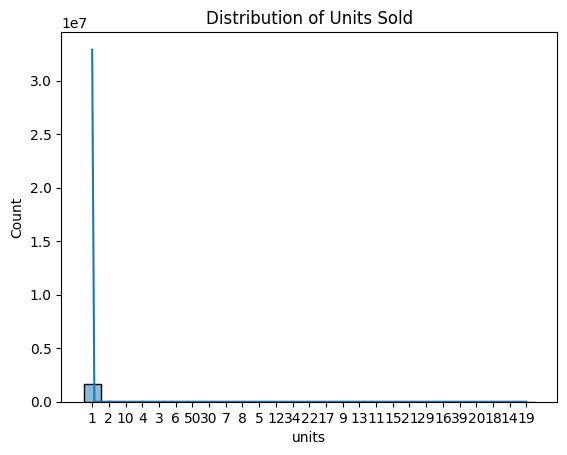

In [37]:
sns.histplot(merged_data['units'].astype(str), bins=50, kde=True)
plt.title('Distribution of Units Sold')
plt.show()

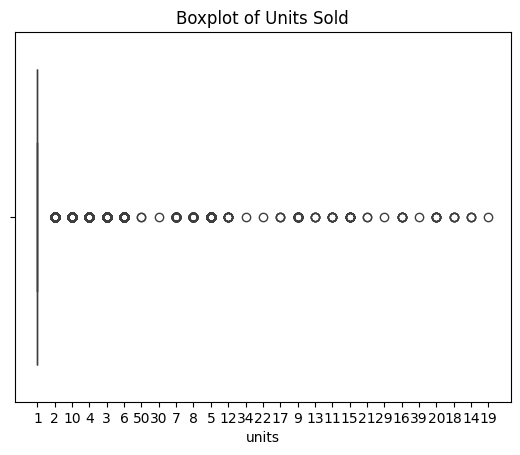

In [41]:
sns.boxplot(x=merged_data['units'].astype(str))
plt.title('Boxplot of Units Sold')
plt.show()

In [45]:
merged_data['Mean Temp (°C)'].describe()

count    1.648824e+06
mean     2.613215e-16
std      1.000000e+00
min     -2.108546e+00
25%     -7.219513e-01
50%     -7.219513e-01
75%      6.871899e-01
max      2.490891e+00
Name: Mean Temp (°C), dtype: float64

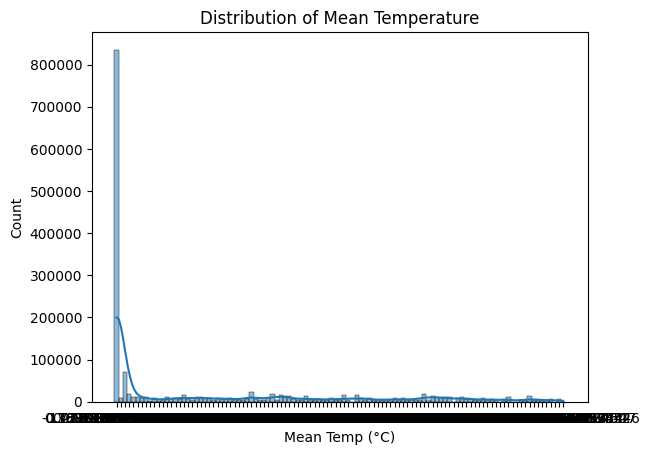

In [38]:
sns.histplot(merged_data['Mean Temp (°C)'].astype(str), bins=50, kde=True)
plt.title('Distribution of Mean Temperature')
plt.show()

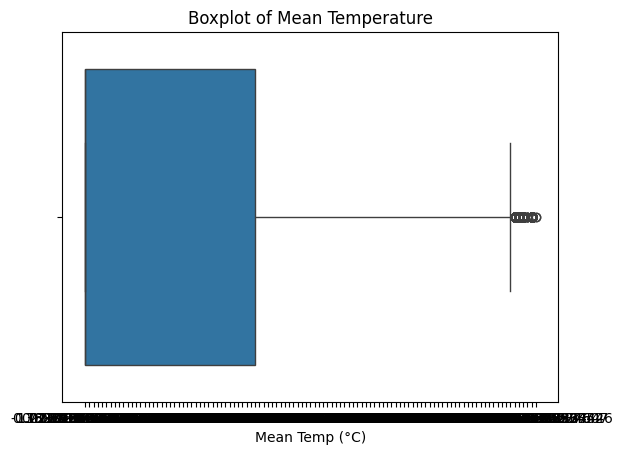

In [42]:
sns.boxplot(x=merged_data['Mean Temp (°C)'].astype(str))
plt.title('Boxplot of Mean Temperature')
plt.show()

In [56]:
merged_data['Mean Temp (°C)'].unique()

array([-0.7219513 ,  1.22830013,  0.3828154 ,  0.6871899 ,  1.17193448,
        0.96901814,  0.74355555,  1.11556883,  1.39739707,  0.72100929,
        1.25084639,  1.19448074,  1.02538379,  0.27008411,  0.85628685,
        1.53267463,  0.51809296,  0.10098716, -0.63176627,  0.06716777,
        0.01080212,  1.51012837, -0.44012306, -1.68016732, -0.49648871,
        0.89010624,  0.55191235,  1.13811509,  0.34899601, -0.55285436,
       -0.8346826 ,  1.84832226,  1.98359981, -1.03759893, -2.01836121,
       -1.11651084, -0.86850199,  0.17989907,  0.29263037, -0.68813191,
        0.15735281,  0.4955467 , -0.51903497,  0.57445861, -2.10854625,
        0.32644975, -1.09396458, -0.77831695,  0.21371846, -0.46266932,
       -1.17287649, -0.40630367, -0.92486764, -0.57540062,  0.9126525 ,
        2.3217937 ,  0.46172731,  2.0174192 , -0.18084108, -0.10192917,
        0.12353342, -0.23720673, -0.21466047, -0.32739177, -0.9474139 ,
       -0.75577069,  0.04462151, -0.04556352,  0.83374059,  0.63

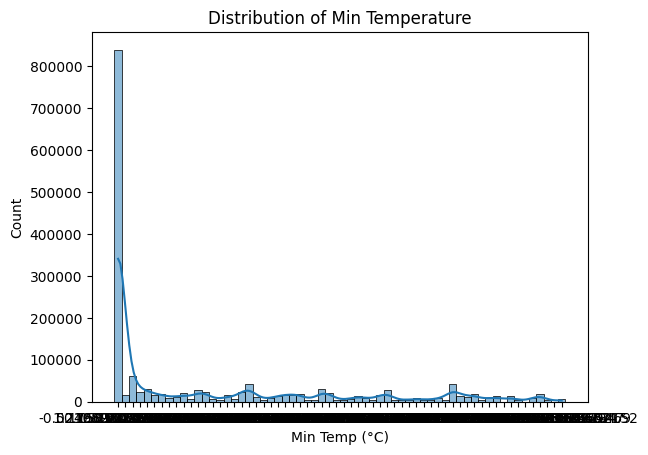

In [64]:
sns.histplot(merged_data['Min Temp (°C)'].astype(str), bins=50, kde=True)
plt.title('Distribution of Min Temperature')
plt.show()

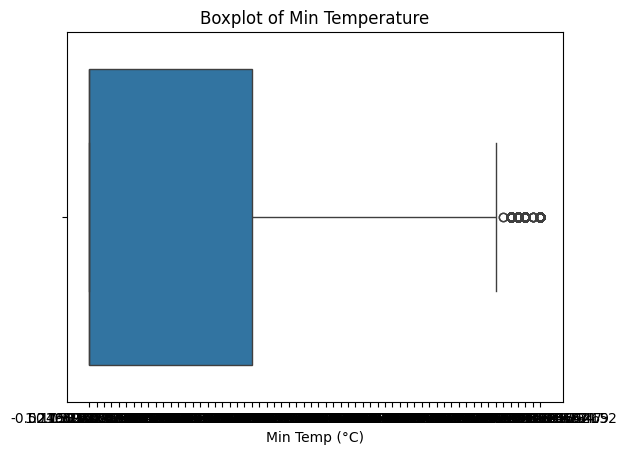

In [65]:
sns.boxplot(x=merged_data['Min Temp (°C)'].astype(str))
plt.title('Boxplot of Min Temperature')
plt.show()

In [66]:
merged_data['Min Temp (°C)'].unique()

array([-0.52165231,  1.24919103,  0.11585129,  0.75335489,  1.32002476,
        0.89502236,  1.1783573 ,  0.61168743,  1.46169223,  1.03668983,
       -0.23831738,  0.18668503,  1.53252596, -0.30915111, -0.59248604,
       -1.01748844, -0.73415351,  1.88669463, -0.80498724, -2.22166191,
       -1.30082338,  0.39918623,  0.25751876, -1.22998964, -1.08832218,
        2.17002957, -3.07166672, -0.09664991,  0.47001996, -0.66331978,
       -2.50499685,  0.54085369, -0.02581617,  0.32835249, -0.87582098,
       -2.78833178, -0.37998484,  0.04501756, -2.00916071, -1.79665951,
        0.68252116,  1.95752836, -0.94665471, -0.45081858, -0.16748364,
       -1.72582578,  2.0283621 ,  0.82418863,  1.74502716,  1.6033597 ,
        1.8158609 ,  1.3908585 ,  2.31169703,  2.59503197,  2.09919583,
        2.38253077,  2.73669943,  2.4533645 ,  2.2408633 ,  2.52419823,
        1.67419343,  1.10752356])

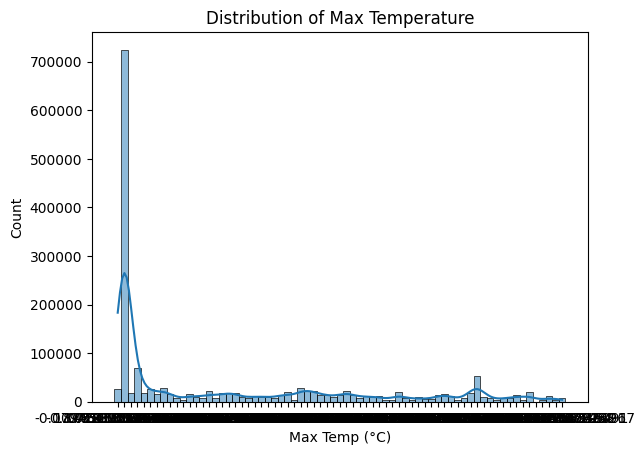

In [67]:
sns.histplot(merged_data['Max Temp (°C)'].astype(str), bins=50, kde=True)
plt.title('Distribution of Max Temperature')
plt.show()

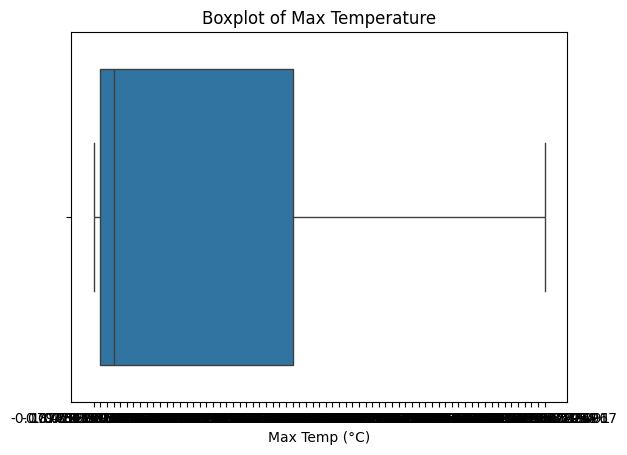

In [68]:
sns.boxplot(x=merged_data['Max Temp (°C)'].astype(str))
plt.title('Boxplot of Max Temperature')
plt.show()

In [69]:
merged_data['Max Temp (°C)'].unique()

array([-0.07943055, -0.87713913,  1.07281518,  0.45237517,  0.85122946,
        0.54100946,  0.93986375,  0.89554661,  1.11713233,  1.02849804,
        1.2944009 ,  0.67396089,  1.16144947,  0.62964375,  0.49669232,
        0.31942374,  0.71827803,  1.38303519,  0.2751066 , -0.69987056,
       -1.143042  ,  0.76259518,  0.40805803, -0.25669912, -1.32031057,
       -0.03511341, -0.30101627, -0.16806484,  1.47166947,  1.69325519,
        0.09783802,  0.23078945, -0.61123627, -0.78850485, -0.12374769,
        0.05352088, -0.7441877 ,  0.18647231, -0.47828484, -0.21238198,
        0.80691232, -1.63053057, -1.01009057,  0.14215517, -0.38965056,
       -0.65555342, -0.34533341, -0.4339677 ,  2.22506091,  0.9841809 ,
        1.87052377,  1.25008376,  0.36374089,  1.20576661,  1.33871804,
        1.78188948,  1.56030376,  1.42735233,  1.6046209 ,  2.04779234,
        2.18074377,  1.82620662,  2.13642663,  1.95915805,  1.64893805,
        1.51598662,  1.91484091,  2.09210948,  2.0034752 ])

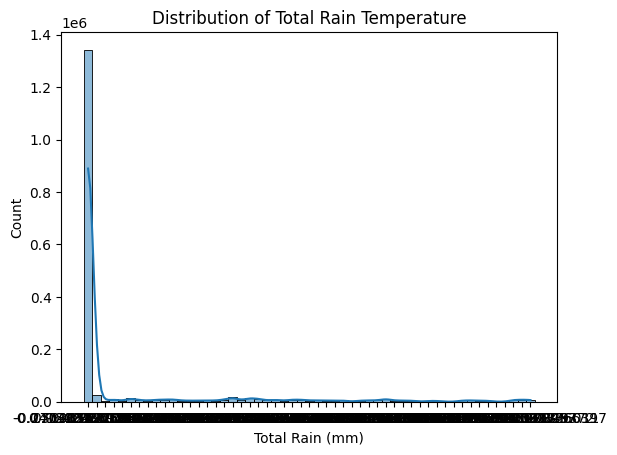

In [70]:
sns.histplot(merged_data['Total Rain (mm)'].astype(str), bins=50, kde=True)
plt.title('Distribution of Total Rain')
plt.show()

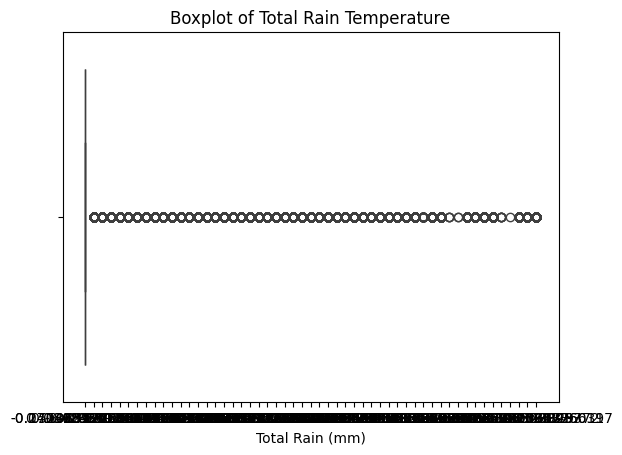

In [71]:
sns.boxplot(x=merged_data['Total Rain (mm)'].astype(str))
plt.title('Boxplot of Total Rain')
plt.show()

In [72]:
merged_data['Total Rain (mm)'].unique()

array([-2.70402798e-01, -4.73289208e-02,  5.10355771e-01,  6.42080175e-02,
        1.36547230e+00, -8.45079003e-02,  1.88597801e+00,  2.70290381e-02,
        1.99751495e+00,  1.55136720e+00,  1.62572515e+00,  9.56503524e-01,
        1.51418822e+00,  2.44366270e+00,  4.45132759e+00,  1.40265128e+00,
        3.61639853e-01,  3.24460874e-01,  4.73176791e-01, -1.58865859e-01,
       -1.21686880e-01,  3.15006331e+00,  1.66290413e+00,  1.03086148e+00,
        2.87281894e-01,  1.14239842e+00, -1.96044839e-01,  4.15389576e+00,
        5.78977085e+00,  4.93465432e+00, -1.01499414e-02,  2.03469393e+00,
        1.47700924e+00,  9.19324545e-01,  1.70008311e+00,  1.38565976e-01,
        5.84713730e-01,  1.21675638e+00,  5.47534750e-01,  5.93848677e+00,
        3.98818833e-01,  1.01386997e-01,  4.82311739e+00,  1.73726209e+00,
        1.32829332e+00,  2.40648372e+00,  3.80229343e-01,  7.33429648e-01,
        4.89747535e+00,  5.34362310e+00,  2.12923935e-01,  6.21892709e-01,
        1.03627853e+01])

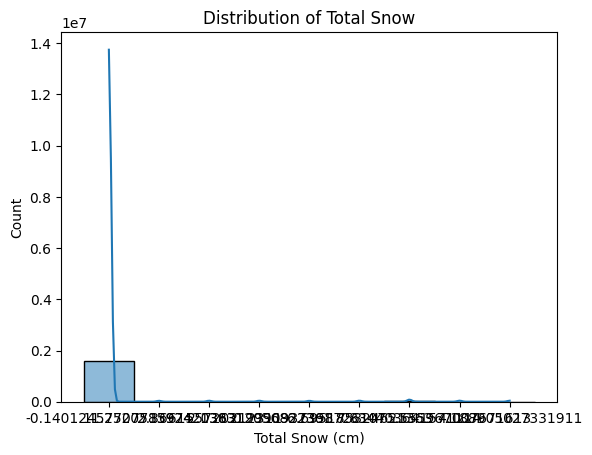

In [73]:
sns.histplot(merged_data['Total Snow (cm)'].astype(str), bins=50, kde=True)
plt.title('Distribution of Total Snow')
plt.show()

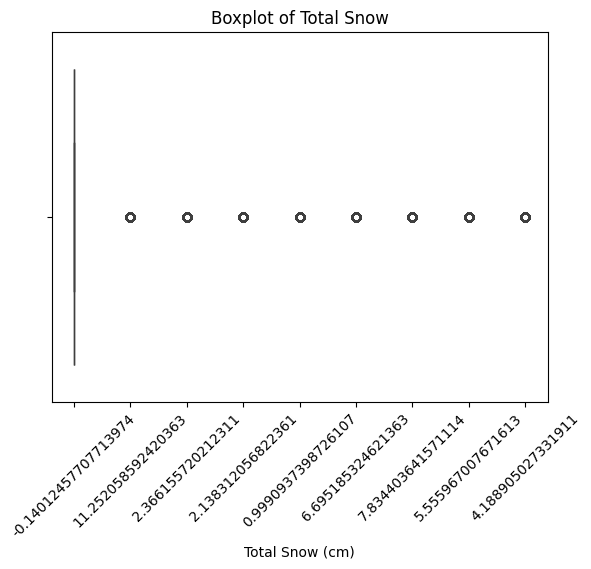

In [76]:
sns.boxplot(x=merged_data['Total Snow (cm)'].astype(str))
plt.title('Boxplot of Total Snow')
plt.xticks(rotation=45)
plt.show()

In [75]:
merged_data['Total Snow (cm)'].unique()

array([-0.14012458, 11.25205859,  2.36615572,  2.13831206,  0.99909374,
        6.69518532,  7.83440364,  5.55596701,  4.18890503])

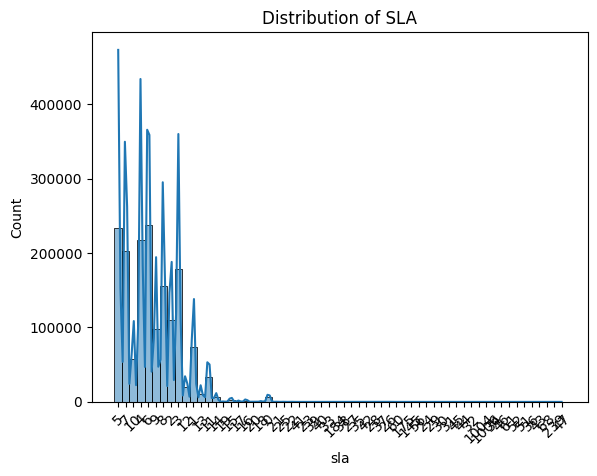

In [80]:
sns.histplot(merged_data['sla'].astype(str), bins=50, kde=True)
plt.title('Distribution of SLA')
plt.xticks(rotation=45)
plt.show()

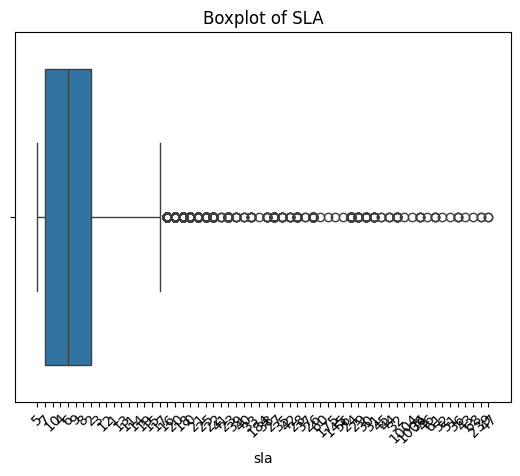

In [81]:
sns.boxplot(x=merged_data['sla'].astype(str))
plt.title('Boxplot of SLA')
plt.xticks(rotation=45)
plt.show()

In [79]:
merged_data['sla'].unique()

array([   5,    7,   10,    4,    6,    9,    8,    2,    3,   12,    1,
         13,   11,   14,   19,   15,   17,   16,   20,   18,    0,   21,
         25,   22,   41,   23,   39,   40,   33,  184,   38,   27,   35,
         42,   28,   37,   26,   60,  175,  145,   56,   24,   29,   30,
         31,   45,   44,   32, 1004, 1006,   34,   46,   61,   52,   51,
         36,   43,   68,  239,   47], dtype=int64)

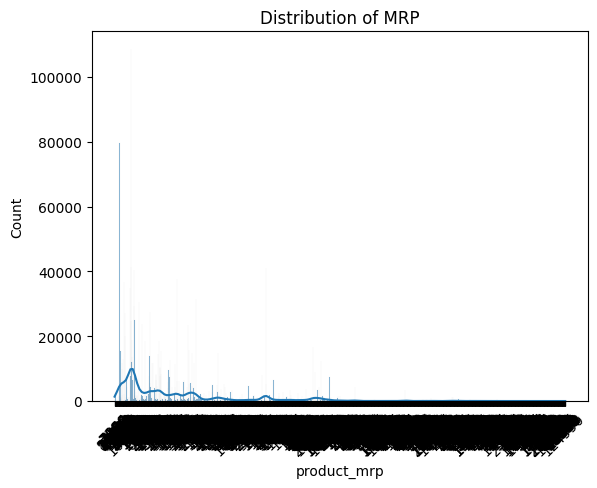

In [82]:
sns.histplot(merged_data['product_mrp'].astype(str), bins=50, kde=True)
plt.title('Distribution of MRP')
plt.xticks(rotation=45)
plt.show()

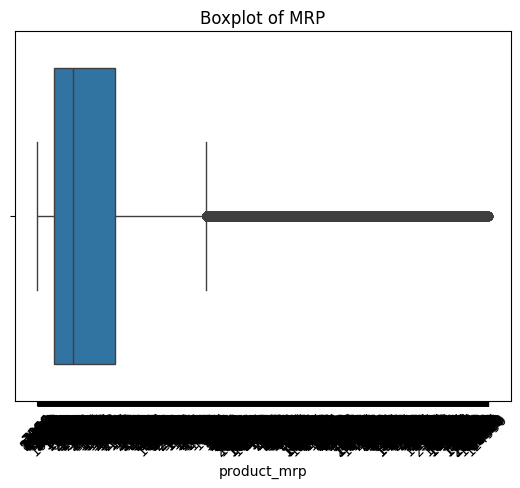

In [83]:
sns.boxplot(x=merged_data['product_mrp'].astype(str))
plt.title('Boxplot of MRP')
plt.xticks(rotation=45)
plt.show()

In [84]:
merged_data['product_mrp'].unique()

array([ 7190,  2099,  4044, ..., 22433, 75000,  3341], dtype=int64)

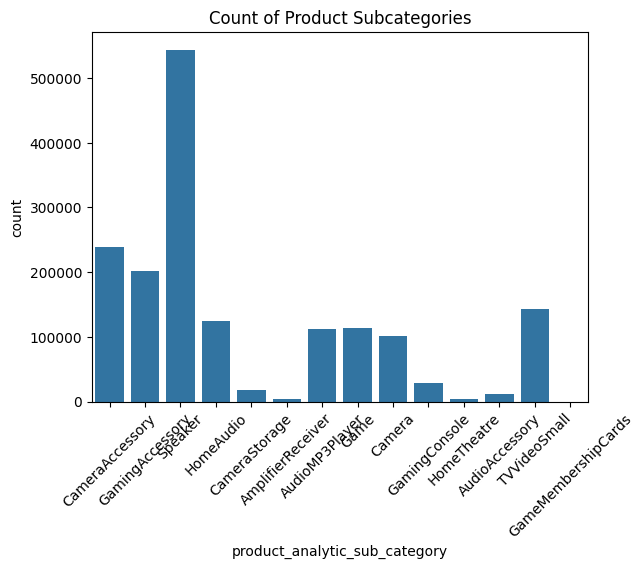

In [46]:
sns.countplot(x='product_analytic_sub_category', data=merged_data)
plt.title('Count of Product Subcategories')
plt.xticks(rotation=45)
plt.show()

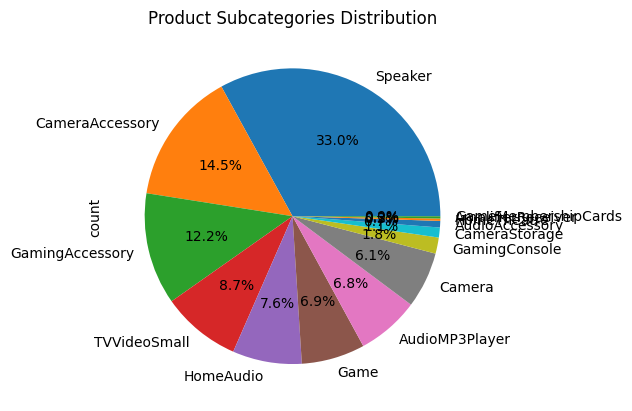

In [51]:
merged_data['product_analytic_sub_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Product Subcategories Distribution')
plt.show()

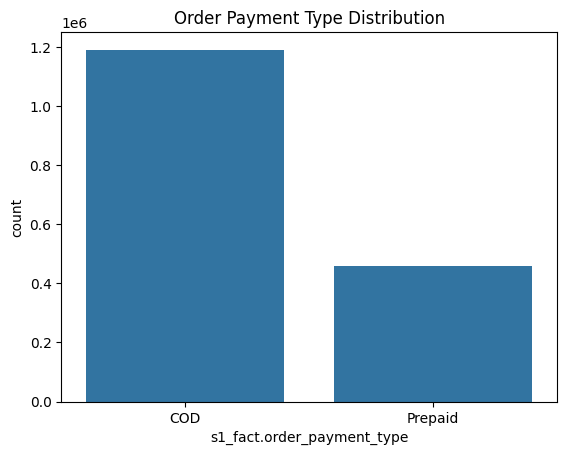

In [47]:
sns.countplot(x='s1_fact.order_payment_type', data=merged_data)
plt.title('Order Payment Type Distribution')
plt.show()

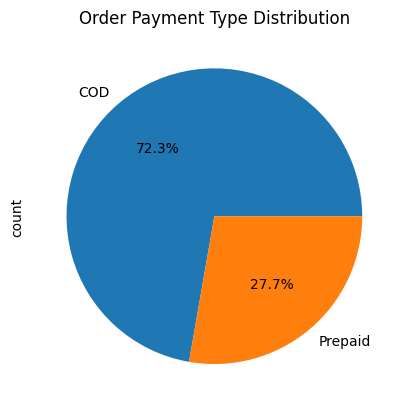

In [52]:
merged_data['s1_fact.order_payment_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Order Payment Type Distribution')
plt.show()

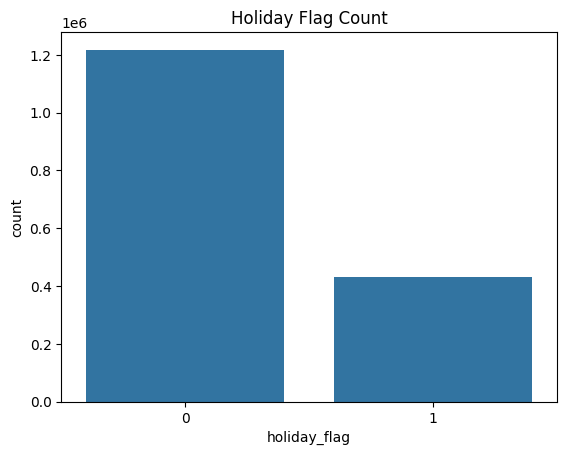

In [48]:
sns.countplot(x='holiday_flag', data=merged_data)
plt.title('Holiday Flag Count')
plt.show()

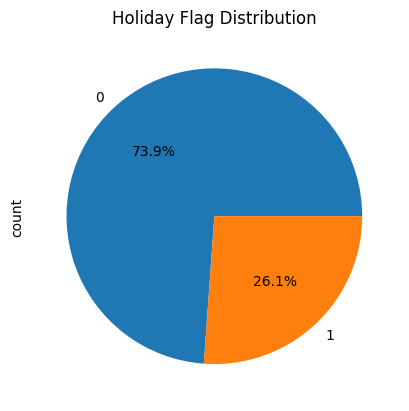

In [62]:
merged_data['holiday_flag'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Holiday Flag Distribution')
plt.show()

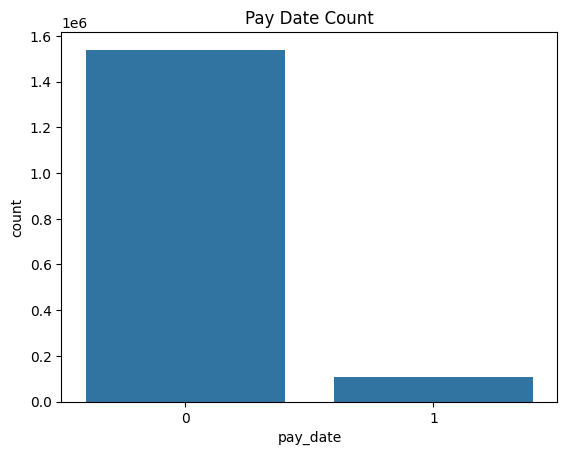

In [63]:
sns.countplot(x='pay_date', data=merged_data)
plt.title('Pay Date Count')
plt.show()

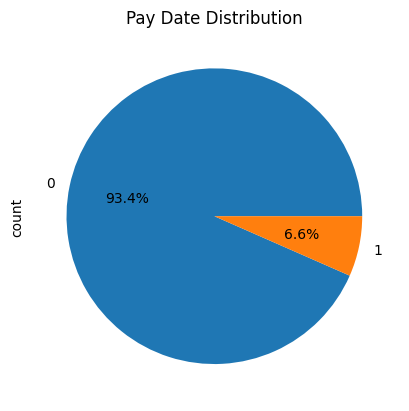

In [61]:
merged_data['pay_date'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pay Date Distribution')
plt.show()

In [53]:
merged_data['product_analytic_sub_category'].value_counts()

product_analytic_sub_category
Speaker                543928
CameraAccessory        239508
GamingAccessory        201899
TVVideoSmall           142995
HomeAudio              124860
Game                   114406
AudioMP3Player         112892
Camera                 101172
GamingConsole           29059
CameraStorage           17985
AudioAccessory          11713
HomeTheatre              4254
AmplifierReceiver        4056
GameMembershipCards        97
Name: count, dtype: int64

In [54]:
merged_data['s1_fact.order_payment_type'].value_counts()

s1_fact.order_payment_type
COD        1191443
Prepaid     457381
Name: count, dtype: int64

In [55]:
merged_data['holiday_flag'].value_counts()

holiday_flag
0    1217878
1     430946
Name: count, dtype: int64

In [85]:
merged_data['product_analytic_sub_category'].unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [106]:
merged_data.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
Day                                0
Date                               0
Data Quality                       0
Max Temp (°C)                      0
Max Temp Flag                      0
Min Temp (°C)                      0
Min Temp Flag                      0
M

In [113]:
merged_data['units'] = pd.to_numeric(merged_data['units'], errors='coerce')

In [143]:
camera_data = merged_data[merged_data['product_analytic_sub_category'] == 'CameraAccessory']

In [145]:
camera_data = camera_data[pd.to_numeric(camera_data['gmv'], errors='coerce').notnull()]

In [146]:
X = camera_data[['units', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'sla', 'product_mrp', 'pay_date', 'holiday_flag']]
y = camera_data['gmv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [147]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}, R2: {r2}")

Linear Regression MSE: 1336954.3720764958, R2: 0.8680226345605427


In [148]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse}, R2: {r2}")

Random Forest MSE: 206499.6032544143, R2: 0.9796154048552291


In [154]:
home_audio_data = merged_data[merged_data['product_analytic_sub_category'] == 'HomeAudio']

In [155]:
home_audio_data = home_audio_data[pd.to_numeric(home_audio_data['gmv'], errors='coerce').notnull()]

In [156]:
X = home_audio_data[['units', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'sla', 'product_mrp', 'pay_date', 'holiday_flag']]
y = home_audio_data['gmv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [157]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}, R2: {r2}")

Linear Regression MSE: 1338093.906290103, R2: 0.6450802288569369


In [158]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse}, R2: {r2}")

Random Forest MSE: 190293.6863583124, R2: 0.9495259702665297


In [163]:
gaming_data = merged_data[merged_data['product_analytic_sub_category'] == 'GamingAccessory']

In [164]:
gaming_data = gaming_data[pd.to_numeric(gaming_data['gmv'], errors='coerce').notnull()]

In [165]:
X = gaming_data[['units', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'sla', 'product_mrp', 'pay_date', 'holiday_flag']]
y = gaming_data['gmv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [166]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}, R2: {r2}")

Linear Regression MSE: 1460160.9424341805, R2: 0.0983170548630683


In [167]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse}, R2: {r2}")

Random Forest MSE: 102291.96930696315, R2: 0.9368323576750398


In [168]:
y_pred = rf_model.predict(X_test)
print(f"Predicted sales for Gaming Accessory: {y_pred[:5]}")

Predicted sales for Gaming Accessory: [ 808.0647619   331.447671   3490.          266.54371853  292.33952667]


In [170]:
X_train.head()

,units,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),sla,product_mrp,pay_date,holiday_flag
235851,1,0.408058,-0.734154,0.010802,1.997515,-0.140125,1,0,0,0
1574467,1,0.939864,1.603360,1.284666,0.621893,-0.140125,5,1099,0,0
1279577,1,-0.877139,-0.521652,-0.721951,-0.270403,-0.140125,7,1100,0,0
1087853,2,0.984181,1.178357,1.138115,0.919325,-0.140125,7,2999,0,0
797332,1,0.895547,0.753355,0.912652,0.324461,-0.140125,4,5990,0,0


In [173]:
Units, Max_Temp_C, Min_Temp_C, Mean_Temp_C, Total_Rain_mm, Total_Snow_cm, SLA, MRP, Pay_Date, Holiday = input().split()

In [176]:
new_data = [Units, Max_Temp_C, Min_Temp_C, Mean_Temp_C, Total_Rain_mm, Total_Snow_cm, SLA, MRP, Pay_Date, Holiday]
new_data = pd.DataFrame(new_data)
new_pred = rf_model.predict(new_data.values.reshape(1, -1))
new_pred

c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2174.50742857])